In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the required packages

In [3]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



**NOTE** : Please enter Category Names same as folder name

In [4]:
Categories=['Audir8','MercedesC63','Gwagon','LamborghiniRevelto']
print("Type y to give categories or type n to go with classification of Audir8,MercedesC63, Gwagon and LamborghiniRevelto");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type y to give categories or type n to go with classification of Audir8,MercedesC63, Gwagon and LamborghiniRevelto
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
Gwagon
Audir8
If not drive Please upload all the 2 category images in google collab with the same names as given in categories


Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

In [5]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/IC'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Gwagon
loaded category:Gwagon successfully
loading... category : Audir8
loaded category:Audir8 successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.597742,0.751710,0.956575,0.599149,0.752898,0.957836,0.601050,0.749316,0.956082,0.603932,...,0.522607,0.475548,0.420646,0.535761,0.488702,0.433800,0.529251,0.482192,0.427290,0
1,0.203475,0.147287,0.143997,0.218764,0.155261,0.153289,0.241597,0.171655,0.162539,0.258669,...,0.672380,0.616939,0.612118,0.671551,0.616515,0.605700,0.652487,0.595489,0.583728,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,0.238915,0.355889,0.084264,0.230772,0.350874,0.091435,0.226267,0.342645,0.098339,0.206968,...,0.769322,0.714401,0.630261,0.769685,0.710245,0.628657,0.768115,0.707261,0.626590,0
5,0.507940,0.511881,0.527184,0.511326,0.516295,0.524443,0.511900,0.517453,0.520328,0.512288,...,0.498266,0.510019,0.518008,0.491711,0.507598,0.511620,0.487163,0.503146,0.503363,0
6,0.344281,0.459808,0.191834,0.593989,0.676619,0.259297,0.627486,0.673149,0.289162,0.457810,...,0.749469,0.818781,0.497653,0.767457,0.833360,0.508454,0.771580,0.824070,0.504866,0
7,0.118798,0.120780,0.062901,0.088779,0.097487,0.056053,0.123179,0.125902,0.084747,0.140995,...,0.415781,0.338460,0.330848,0.421383,0.349238,0.343666,0.392996,0.335366,0.339944,1
8,0.776261,0.762264,0.751884,0.778696,0.764700,0.754320,0.789718,0.775722,0.765342,0.792007,...,0.636834,0.585853,0.550559,0.670502,0.619521,0.584227,0.665219,0.614239,0.578944,1
9,0.167994,0.176602,0.090166,0.168932,0.173886,0.091510,0.194532,0.191108,0.107575,0.199745,...,0.510220,0.450585,0.417052,0.510760,0.450741,0.419953,0.484583,0.421991,0.389121,1


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Splitting the data into training and testing data

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


This Part of code may take a while for training the data using SVC model

In [8]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}

Predicting our testing data

In [9]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 1, 1])

In [10]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 1])

In [11]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 33.33333333333333% accurate


Using Pickle to save the model to disk

In [12]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

Enter URL of Image/content/drive/MyDrive/IC/Gwagon/g wagon bue.jpg


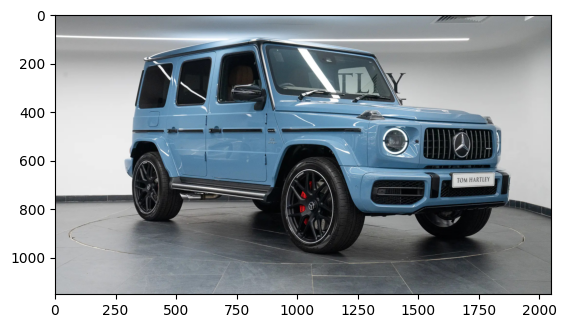

Gwagon = 59.80157392387589%
Audir8 = 40.19842607612409%
The predicted image is : Gwagon
Is the image a Gwagon ?(y/n)
y
Thank you for your feedback


In [13]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")


This model learns from its mistake and rectifies them and does not repeat the same mistake again ;)